In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

In [2]:
# Load the data
df = pd.read_csv(r'c:/Users/honey/Documents/placment work/Electronical-AI-Device-Recogniser/khanya/data managment/acs-f2-dataset.csv')


In [3]:

# Data Preprocessing
# Drop the 'time' column as it's not relevant for prediction
df = df.drop('time', axis=1)

In [4]:
# Convert categorical labels to numeric
le = LabelEncoder()
df['equipment'] = le.fit_transform(df['equipment'])


In [5]:
# Split features and labels
X = df.drop('equipment', axis=1)
y = df['equipment']


In [6]:
# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [7]:
# Convert labels to one-hot encoding
y_encoded = to_categorical(y)


In [8]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

In [9]:
# Define the model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dense(y_encoded.shape[1], activation='softmax')
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

c:\Users\honey\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
# Train the model
history = model.fit(X_train, y_train, epochs=1000, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/1000
2718/2718 ━━━━━━━━━━━━━━━━━━━━ 3s 980us/step - accuracy: 0.6512 - loss: 0.9986 - val_accuracy: 0.7134 - val_loss: 0.8132
Epoch 2/1000
2718/2718 ━━━━━━━━━━━━━━━━━━━━ 3s 975us/step - accuracy: 0.6482 - loss: 1.0096 - val_accuracy: 0.7157 - val_loss: 0.7986
Epoch 3/1000
2718/2718 ━━━━━━━━━━━━━━━━━━━━ 3s 984us/step - accuracy: 0.6513 - loss: 0.9988 - val_accuracy: 0.7208 - val_loss: 0.7941
Epoch 4/1000
2718/2718 ━━━━━━━━━━━━━━━━━━━━ 3s 969us/step - accuracy: 0.6528 - loss: 0.9909 - val_accuracy: 0.7175 - val_loss: 0.8016
Epoch 5/1000
2718/2718 ━━━━━━━━━━━━━━━━━━━━ 3s 992us/step - accuracy: 0.6522 - loss: 0.9984 - val_accuracy: 0.7163 - val_loss: 0.8019
Epoch 6/1000
2718/2718 ━━━━━━━━━━━━━━━━━━━━ 3s 974us/step - accuracy: 0.6547 - loss: 0.9942 - val_accuracy: 0.7140 - val_loss: 0.8085
Epoch 7/1000
2718/2718 ━━━━━━━━━━━━━━━━━━━━ 3s 981us/step - accuracy: 0.6543 - loss: 0.9940 - val_accuracy: 0.7102 - val_loss: 0.8094
Epoch 8/1000
2718/2718 ━━━━━━━━━━━━━━━━━━━━ 3s 981us/step - ac

In [14]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test accuracy: {test_accuracy:.4f}")
print(f"Test loss: {test_loss:.4f}")

Test accuracy: 0.7168
Test loss: 0.7913


In [15]:
# Make predictions
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

850/850 ━━━━━━━━━━━━━━━━━━━━ 1s 604us/step


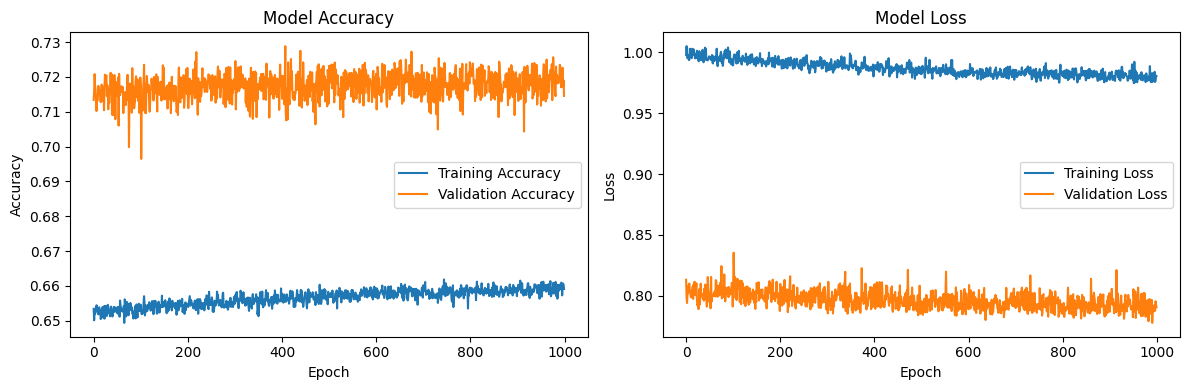

In [16]:
# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()

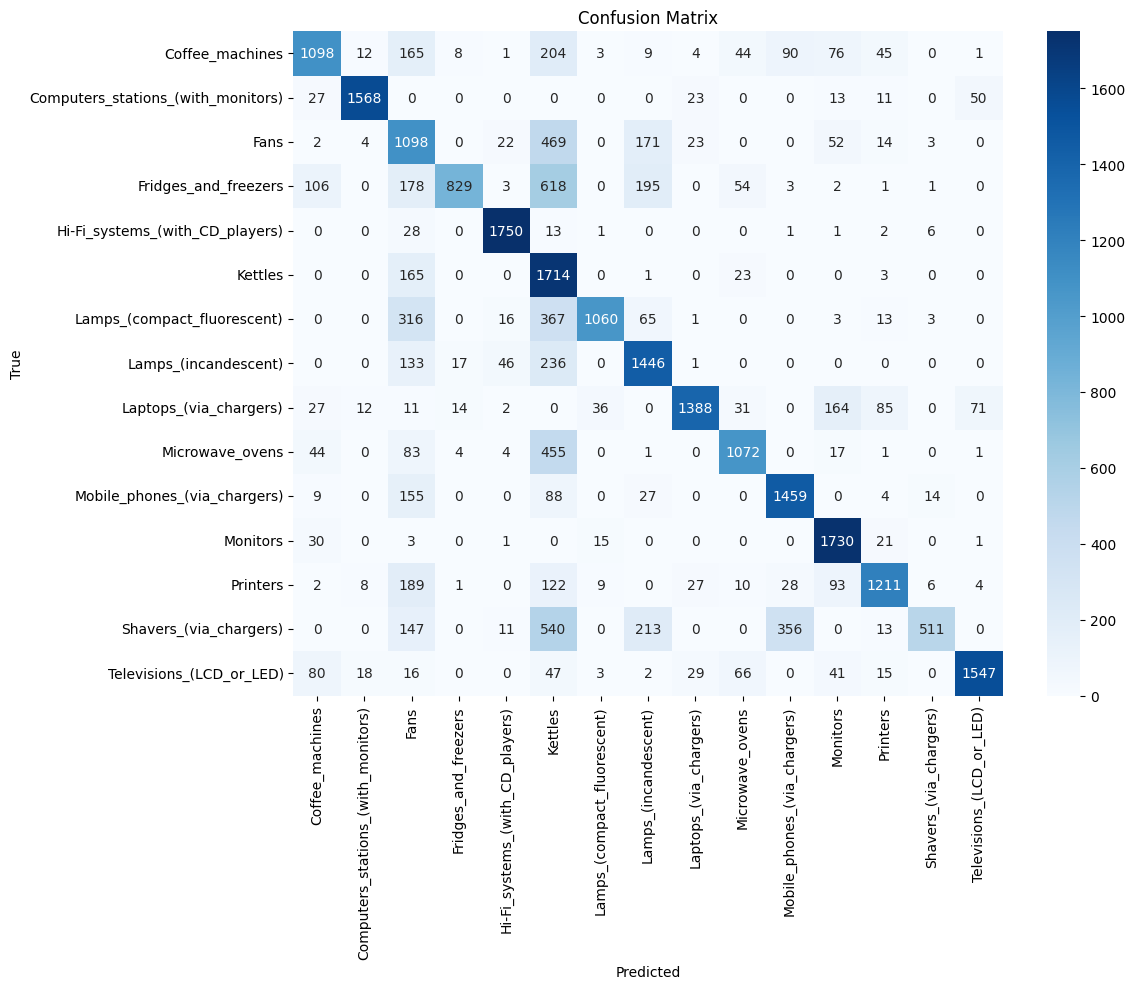

In [17]:
# Plot confusion matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.tight_layout()
plt.show()

In [18]:
# Function to predict appliance and probabilities
def predict_appliance(electrical_readings):
    # Ensure the input is a 2D array
    if electrical_readings.ndim == 1:
        electrical_readings = electrical_readings.reshape(1, -1)
    
    # Scale the input
    scaled_input = scaler.transform(electrical_readings)
    
    # Make prediction
    probabilities = model.predict(scaled_input)[0]
    predicted_class = le.inverse_transform([np.argmax(probabilities)])[0]
    
    return predicted_class, probabilities

In [19]:
# Example usage
example_reading = np.array([50.0, 340, 111.284, -40.89, 0.533, 224.038])
predicted_appliance, probabilities = predict_appliance(example_reading)

print(f"Predicted appliance: {predicted_appliance}")
print("Probabilities for each appliance:")
for appliance, prob in zip(le.classes_, probabilities):
    print(f"{appliance}: {prob:.4f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Predicted appliance: Televisions_(LCD_or_LED)
Probabilities for each appliance:
Coffee_machines: 0.0000
Computers_stations_(with_monitors): 0.2528
Fans: 0.0000
Fridges_and_freezers: 0.0000
Hi-Fi_systems_(with_CD_players): 0.0000
Kettles: 0.0000
Lamps_(compact_fluorescent): 0.0000
Lamps_(incandescent): 0.0000
Laptops_(via_chargers): 0.0018
Microwave_ovens: 0.0000
Mobile_phones_(via_chargers): 0.0000
Monitors: 0.0000
Printers: 0.0018
Shavers_(via_chargers): 0.0000
Televisions_(LCD_or_LED): 0.7436


c:\Users\honey\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


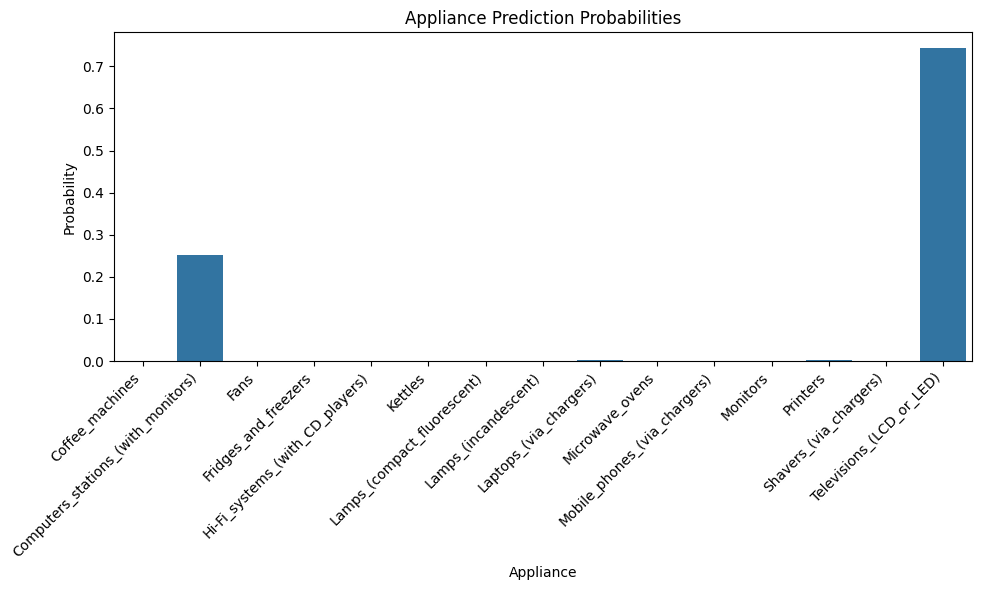

In [20]:

# Plot probabilities
plt.figure(figsize=(10, 6))
sns.barplot(x=le.classes_, y=probabilities)
plt.title('Appliance Prediction Probabilities')
plt.xlabel('Appliance')
plt.ylabel('Probability')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [25]:
import joblib
joblib.dump(scaler, 'scaler2.pkl')

model.save('appliance_recogniser#2.keras')